In [2]:
import thermoTools
import thermoToolsAdditions as tta
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from paths import THERMOCHIMICA, THERMOCHIMICA_CHLORIDE_DATA, SALT_OPTIMIZATION

# Required regardless
tta.Config.set_config(output_path=SALT_OPTIMIZATION)

script_dir = SALT_OPTIMIZATION

### Example 1: Standalone Thermochimica
This is an example of running a standalone thermochimica calculation for a series of temperatures

In [18]:
dataFile = THERMOCHIMICA_CHLORIDE_DATA
scriptName = "test"
elements = ['Na', 'Cl', 'Mg', 'Pu']

component_fractions = {'Na Cl': 0.8, 'Mg Cl_2': 0.1, 'Pu Cl_3': 0.1}

tstart = 1500
tend = 2000
ntstep = 20
pstart = 1
pend = 1
npstep = 1
masses = tta.component_fractions_to_element_fractions(component_fractions, elements)

print(masses)

# Write an input script
thermoTools.WriteInputScript(scriptName, str(dataFile), elements, tstart, tend, ntstep, pstart, pend, npstep, masses, heatCapacity=True)

# Run an input script
thermochimicaPath = THERMOCHIMICA
outputPath = script_dir / "outputs"
outputName = "output.json"

thermoTools.RunInputScript(scriptName, jsonName=str(outputPath / outputName), thermochimica_path=str(thermochimicaPath), noOutput=True)

[0.8, 1.3, 0.1, 0.1]


### Example 2: Solubility Calculation
This is an example solubility calculation for $\text{PuCl}_3$ in the eutectic salt $x(\text{LiCl}):x(\text{KCl}) = (0.586:0.414)$ 

In [4]:
# File IO input parameters
tta.Config.set_config(
    thermochimica_path = THERMOCHIMICA,
    data_file = THERMOCHIMICA_CHLORIDE_DATA
)

# Physical parameters
temp = 723
press = 1
unit_ratio_of_other_components = {'Li Cl': 0.586, 'K Cl': 0.414}
component_to_vary = 'Pu Cl_3'
compstart = 0.01
compstop = 0.4
n_comp_step = 20
calc = tta.solubility_calculation(temp, press, unit_ratio_of_other_components, component_to_vary, n_comp_step, \
                                  compstart=compstart, compstop=compstop, fuzzy=True)

/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
/home/mlouis9/PythonProjects/seniorDesign/saltOptimizati

In [5]:
# calc.mole_fraction_element_by_phase['Pu']
list(calc.output.values())[0]['# pure condensed phases']

1

In [6]:
calc.stable_phases

{'1': [('MSCL',
   2.02,
   [0.004104636184263369,
    0.20203689240233097,
    0.5041046361842633,
    0.2897538352291422]),
  ('K3PuCl6_S1(s)', 0.00202, [0.1, 0.3, 0.6, 0.0])],
 '2': [('MSCL',
   2.061052631578947,
   [0.004371958690567339,
    0.18183745154641198,
    0.5043719586905674,
    0.30941863107245327]),
  ('K3PuCl6_S1(s)', 0.02249913156255506, [0.1, 0.3, 0.6, 0.0])],
 '3': [('MSCL',
   2.1021052631578945,
   [0.0052699180783093835,
    0.15848190360895767,
    0.5052699180783093,
    0.33097826023442356]),
  ('K3PuCl6_S1(s)', 0.0421985374011967, [0.1, 0.3, 0.6, 0.0])],
 '4': [('MSCL',
   1.8642997732642308,
   [0.005921940497426448,
    0.14988748033277238,
    0.5059219404974264,
    0.3382686386723748]),
  ('FM3M',
   0.11185953651400367,
   [0.0, 0.0026415507055433354, 0.5, 0.49735844929445666]),
  ('K3PuCl6_S1(s)', 0.06400232444862858, [0.1, 0.3, 0.6, 0.0])],
 '5': [('MSCL',
   1.081492945212058,
   [0.005921939920265054,
    0.1498874796301039,
    0.5059219399202651

In [7]:
calc.output['20']['elements']

{'Pu': {'moles': 0.4000000000000001, 'element potential': -50050.47773205744},
 'K': {'moles': 0.24839999999999998, 'element potential': -190360.38572171322},
 'Cl': {'moles': 1.8000000000000003, 'element potential': -349754.87584552314},
 'Li': {'moles': 0.3516, 'element potential': -115381.02742892805}}

### Example 3
Calculate reference pseudo-binary phase diagrams for each of the constituient binary subsystems of the ternary chloride salt $\text{LiCl-KCl-PuCl}_3$ these are to be compared with (zhou2017thermodynamic)

In [15]:
# Physical input parameters
press = 1
tunit = 'K'
punit = 'atm'
elements_used = ['Pu', 'Cl', 'K']
munit = 'moles'

left_endmember_composition = {'K Cl': 1.0}
right_endmember_composition = {'Pu Cl_3': 1.0}

xlo = 0
xhi = 1
nxstep = 30
tlo = 500
thi = 1200
ntstep = 30

calc = tta.pseudo_binary_calculation(xlo, xhi, nxstep, tlo, thi, ntstep, elements_used,\
                              left_endmember_composition, right_endmember_composition, thermochimica_plotting=True)

/home/mlouis9/PythonProjects/seniorDesign/saltOptimization/outputs
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
Thermochimica calculation initiated.


Thermochimica calculation finished.


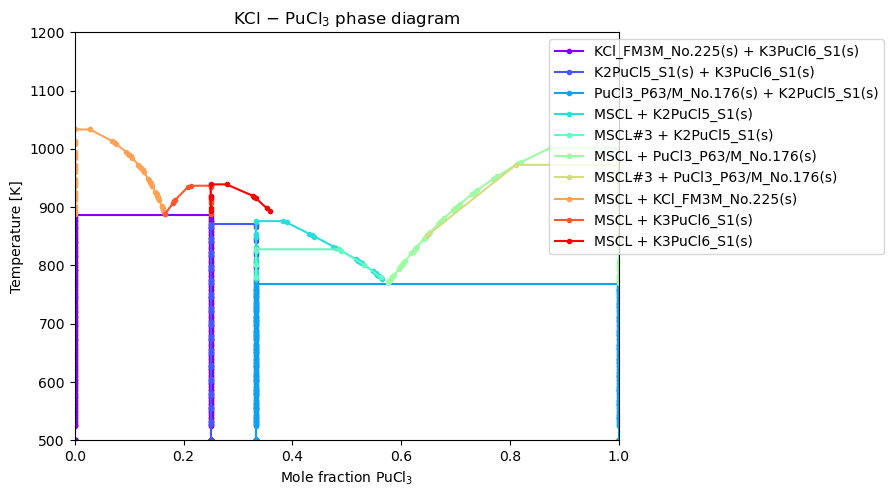

In [16]:
calc.processPhaseDiagramData()
calc.plotMarker = '.-'
calc.makePlot()

### Example 4: Solubility via the Pseudo Binary Phase Diagram
If we're only considering a ternary system, and the ratio of the other two components is fixed (say we want them to be a eutectic point), then we can let that fixed ratio be an endmember and the other be the component whose solubility we're investigating, and view the stable phases as a function of that species. Again, we investigate the solubility of $\text{PuCl}_3$ in the eutectic salt $x(\text{LiCl}):x(\text{KCl}) = (0.586:0.414)$

In [11]:
# Physical input parameters
press = 1
tunit = 'K'
punit = 'atm'
elements_used = ['Pu', 'Cl', 'K', 'Li']
munit = 'moles'

left_endmember_composition = {'K Cl': 0.414, 'Li Cl': 0.586}
right_endmember_composition = {'Pu Cl_3': 1.0}

xlo = 0
xhi = 1
nxstep = 70
tlo = 500
thi = 1200
ntstep = 70

calc = tta.pseudo_binary_calculation(xlo, xhi, nxstep, tlo, thi, ntstep, elements_used,\
                              left_endmember_composition, right_endmember_composition)

/home/mlouis9/PythonProjects/seniorDesign/saltOptimization/outputs
/home/mlouis9/PythonProjects/seniorDesign/saltOptimization
Thermochimica calculation initiated.
Thermochimica calculation finished.


Now load output using thermoToolsAdditions, and make a pseudo-binary phase diagram

/home/mlouis9/PythonProjects/seniorDesign/modules/thermoToolsAdditions.py:209: UserWarning: Warning: state 912 is missing data! Excluding this state from output
/home/mlouis9/PythonProjects/seniorDesign/modules/thermoToolsAdditions.py:209: UserWarning: Warning: state 1247 is missing data! Excluding this state from output
/home/mlouis9/PythonProjects/seniorDesign/modules/thermoToolsAdditions.py:209: UserWarning: Warning: state 1377 is missing data! Excluding this state from output
/home/mlouis9/PythonProjects/seniorDesign/modules/thermoToolsAdditions.py:209: UserWarning: Warning: state 1382 is missing data! Excluding this state from output
/home/mlouis9/PythonProjects/seniorDesign/modules/thermoToolsAdditions.py:209: UserWarning: Warning: state 1640 is missing data! Excluding this state from output
/home/mlouis9/PythonProjects/seniorDesign/modules/thermoToolsAdditions.py:209: UserWarning: Warning: state 1664 is missing data! Excluding this state from output
/home/mlouis9/PythonProjects/

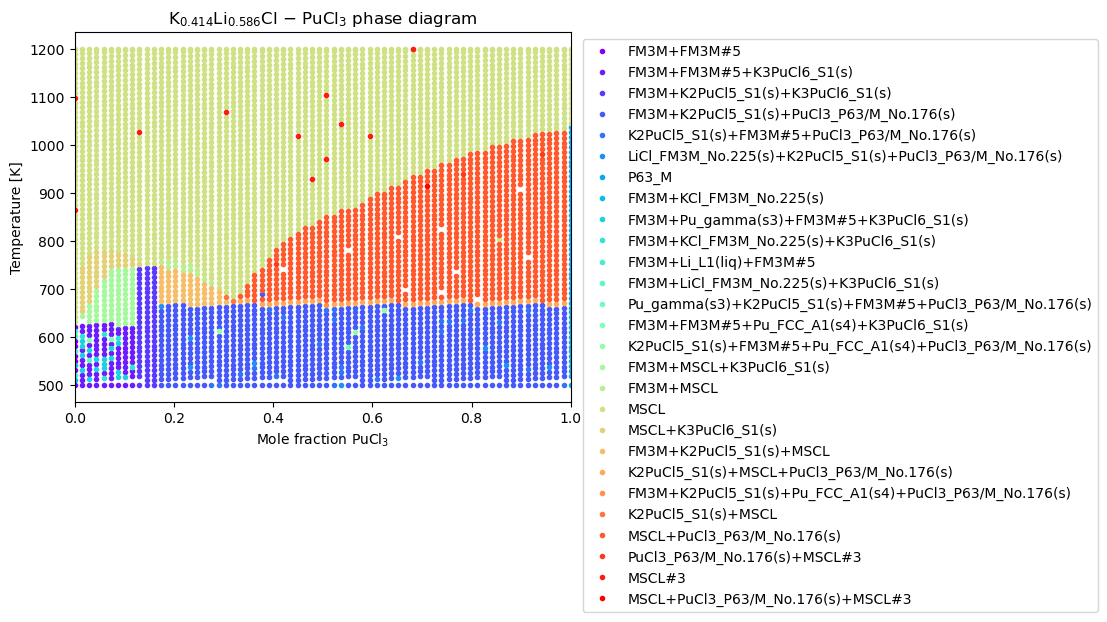

In [13]:
# Load output and get element compositions
loaded_output = tta.thermoOut(default=True)

# Create pseudo binary phase diagram object
diagram = tta.pseudoBinaryDiagram(left_endmember_composition, right_endmember_composition, default=True,\
                                  plot_everything=True)
diagram.plot_phase_regions(plot_marker='.', plot_mode='region')
diagram.plot.fig.savefig("filtered.png", bbox_inches='tight')